In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from __future__ import division #Ensure division returns float
from numpy import mean, std # version >= 1.7.1 && <= 1.9.1
from math import sqrt
import sys

In [2]:
file_path = 'https://github.com/Danielaaron1994/G-N/raw/main/genderdata.csv'

In [3]:
df = pd.read_csv(file_path, error_bad_lines=False)

In [4]:
# Fixing some minor typed response errors in the dataframe

df = df.drop(columns=['Unnamed: 0'])
df = df.replace('2.0','Female')
df = df.replace('1', '1.0')
df = df.replace('1.0','Male')

In [5]:
# To increase the accuracy of data we remove the lowest working memory & short term memory group because it suggests they were less attentive during the task

options = ['AVERAGE', 'HIGH'] 
df = df[df['WM'].isin(options)]
df = df[df['SHM'].isin(options)]

In [6]:
# As there is no statistically significant relationship at this stage between variables we use Cohen's d effect size for screening smaller effects
def cohen(x,y):
        return (mean(x) - mean(y)) / sqrt((std(x, ddof=1) ** 2 + std(y, ddof=1) ** 2) / 2.0)

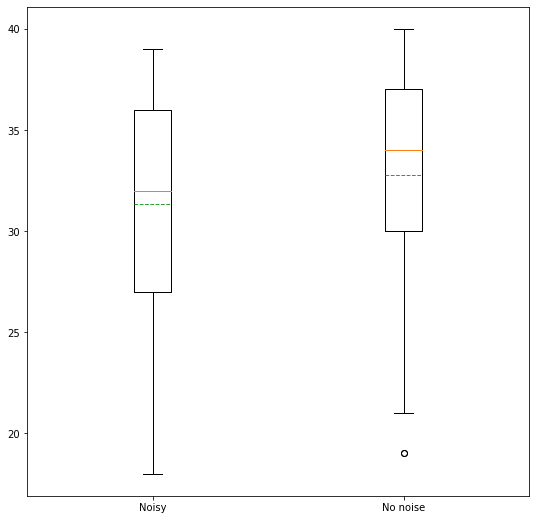

In [7]:
# Here we see the difference in memory performance of participants in noisy and without noise condition.


plt.figure(figsize=(9,9))
plt.boxplot([df['NOISY WORDS']
             ,df['NO NOISE WORDS']], meanline=True, showmeans= True)
plt.xticks([1, 2], ['Noisy', 'No noise'])
plt.show()

In [8]:
# There is no significant difference between noisy and no noise condition performance

ttest_ind(df['NO NOISE WORDS'],df['NOISY WORDS'])

Ttest_indResult(statistic=1.086622387738766, pvalue=0.2808282295449201)

In [9]:
# Effect size suggest that No noise condition outperforms noisy condition slightly better
cohen(df['NOISY WORDS'],df['NO NOISE WORDS'])

-0.2526345735616048

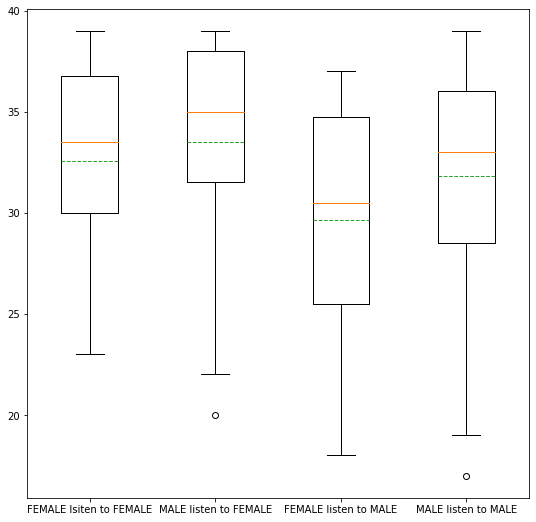

In [15]:
# Here we see the effect of gender of the speaker on performance of participants regardless of the noise factor
plt.figure(figsize=(9,9))
plt.boxplot([ df['FEMALE WORDS'].where(df['GENDER'] == "Female").dropna(),
             df['FEMALE WORDS'].where(df['GENDER'] == "Male").dropna()
            ,df['MALE WORDS'].where(df['GENDER'] == "Female").dropna(),
             df['MALE WORDS'].where(df['GENDER'] == "Male").dropna()
             ], meanline=True, showmeans= True)
plt.xticks([1, 2,3,4], ['FEMALE lsiten to FEMALE', 'MALE listen to FEMALE','FEMALE listen to MALE','MALE listen to MALE'])
plt.show()

In [16]:
# There is no statistically significant DIFFERENCE 
#But effect size suggests a tencency toward female voise in both genders regardless of noise 
 


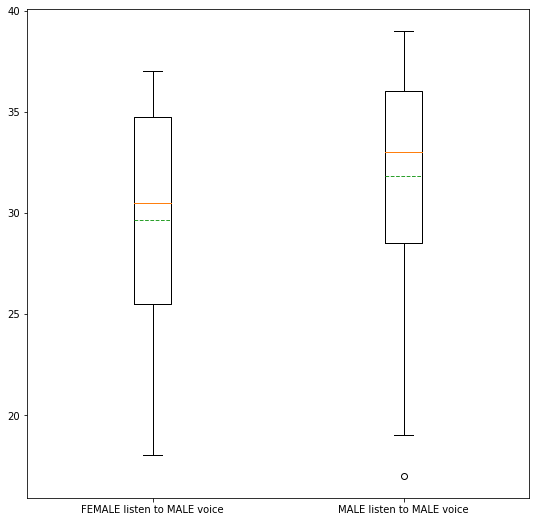

In [19]:
# Male participants are more accurate when using MALE voice than female participants when using MALE voice
# The effect size is reported below
# The chart is as you see 

plt.figure(figsize=(9,9))
plt.boxplot([
            df['MALE WORDS'].where(df['GENDER'] == "Female").dropna(),
             df['MALE WORDS'].where(df['GENDER'] == "Male").dropna()
             ], meanline=True, showmeans= True)
plt.xticks([1, 2], ['FEMALE listen to MALE voice','MALE listen to MALE voice'])
plt.show()

In [20]:
# Male listen to male vs female listen to male comparison 
cohen(df['MALE WORDS'].where(df['GENDER'] == "Male").dropna(),
      df['MALE WORDS'].where(df['GENDER'] == "Female").dropna())

0.3767755629593401

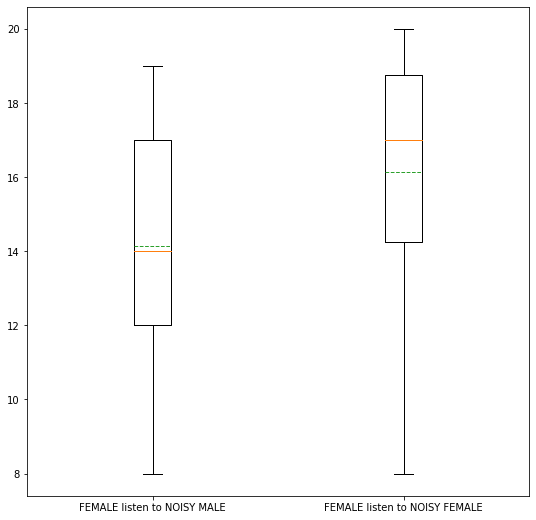

In [21]:
# Below you see the performance of FEMALE participants in NOISY condition when the speaker is MALE vs FEMALE
plt.figure(figsize=(9,9))
plt.boxplot([
            df['MALE NOISY WORDS'].where(df['GENDER'] == "Female").dropna(),
             df['FEMALE NOISY WORDS'].where(df['GENDER'] == "Female").dropna()
             ], meanline=True, showmeans= True)
plt.xticks([1, 2], ['FEMALE listen to NOISY MALE','FEMALE listen to NOISY FEMALE'])
plt.show()

In [22]:
# Effect size is noticebly big!
cohen(df['MALE NOISY WORDS'].where(df['GENDER'] == "Female").dropna(),
      df['FEMALE NOISY WORDS'].where(df['GENDER'] == "Female").dropna())

-0.5913237563486574

In [24]:
# But t test is not significant

ttest_ind(df['MALE NOISY WORDS'].where(df['GENDER'] == "Female").dropna(), 
          df['FEMALE NOISY WORDS'].where(df['GENDER'] == "Female").dropna())

Ttest_indResult(statistic=-1.5644956036230988, pvalue=0.12979251398306454)

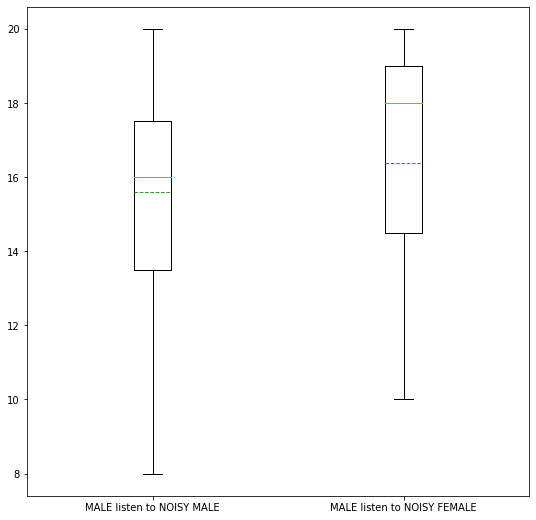

In [25]:
# The opposite is not true for MALE participants
plt.figure(figsize=(9,9))
plt.boxplot([
            df['MALE NOISY WORDS'].where(df['GENDER'] == "Male").dropna(),
             df['FEMALE NOISY WORDS'].where(df['GENDER'] == "Male").dropna()
             ], meanline=True, showmeans= True)
plt.xticks([1, 2], ['MALE listen to NOISY MALE','MALE listen to NOISY FEMALE'])
plt.show()

In [27]:
# Effect size is almost half 
cohen(df['FEMALE NOISY WORDS'].where(df['GENDER'] == "Male").dropna(),
      df['MALE NOISY WORDS'].where(df['GENDER'] == "Male").dropna())

0.2542293117578782

In [28]:
# The same is true even without considering the noise factor
# Female participants performed less with a male voice
cohen(df['FEMALE WORDS'].where(df['GENDER'] == "Female").dropna(),
      df['MALE WORDS'].where(df['GENDER'] == "Female").dropna())

0.5351473054703386

In [29]:
# But as we see below, the same is not true for male participants with an effect size of almost half the female one
cohen(df['FEMALE WORDS'].where(df['GENDER'] == "Male").dropna(),
      df['MALE WORDS'].where(df['GENDER'] == "Male").dropna())

0.2863233997204319

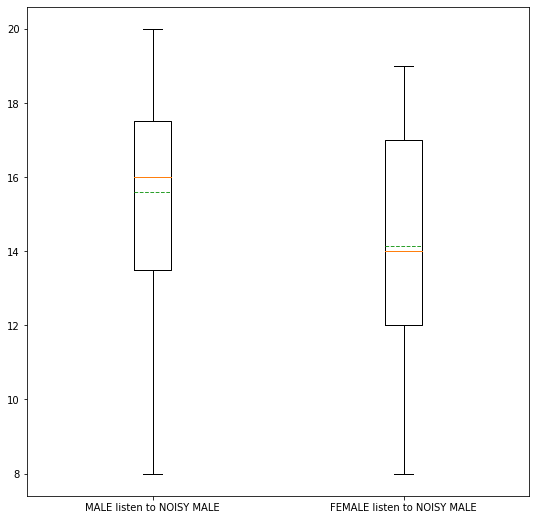

In [30]:
# Now we see how male and female participants react to male voice in noisy situtaion 
plt.figure(figsize=(9,9))
plt.boxplot([
            df['MALE NOISY WORDS'].where(df['GENDER'] == "Male").dropna(),
             df['MALE NOISY WORDS'].where(df['GENDER'] == "Female").dropna()
             ], meanline=True, showmeans= True)
plt.xticks([1, 2], ['MALE listen to NOISY MALE','FEMALE listen to NOISY MALE'])
plt.show()

In [31]:
# The effect size is average
cohen(df['MALE NOISY WORDS'].where(df['GENDER'] == "Male").dropna(),
      df['MALE NOISY WORDS'].where(df['GENDER'] == "Female").dropna())

0.46961534784610165

In [ ]:
# AS SO FAR WE SEE IN THE DATA, WE CAN DRAW BELOW CONCLUSIONS:
#1. No noise condition memory score is slighly higher than noisy condition but their difference is not significant
#2. People with higher working memory capacity work better in both noisy and no noise condition and noise does not change their score
#3. Both genders show a tendency toward female voice in  with and without noise conditions
#4. Female participants' performance deteriorate more when noise is combined with male voice
#5. Male participants on the other hand can handle male voice and noise more



In [ ]:
# From above information we can come up with the idea that 
# probably for each participant their own gender voice should be used in a bilingual simultaneous conversation
# However, the data is not enough for a firm conclusion, we need more data to get a more accurate result
# I hereby, ask for the fund to carry on to the second data gathering from more participants and minor modifications
# In the next study, I would also like to add the effect of pitch on the perception as well to get enough data for the first paper 